# EDA
- the data has predictions in a form of distribution. with the predicted mean, predicted standard deviation and actual (true) value. From 3 diferent variables.
- granularity is 10 minutes 
- data is between 2020-10-05 and 2022-10-01
- some intervals of missing data

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read dataset

In [3]:
data = pd.read_parquet("jungle_aggregator/jungle_aggregator/jungle_case_1_data")
data.head()

,prediction_mu__var1,prediction_mu__var2,prediction_mu__var3,prediction_sigma__var1,prediction_sigma__var2,prediction_sigma__var3,true_value__var1,true_value__var2,true_value__var3
index,,,,,,,,,
2020-10-05 09:40:00,7.309471,8.833872,3651.515605,-3.925765,-0.606189,146.713261,2.300285,16.459242,3536.253347
2020-10-05 09:50:00,7.001734,10.211243,2879.876601,-0.473178,-0.137894,188.500357,2.859461,15.100006,2832.341050
2020-10-05 10:00:00,11.036155,12.300796,3126.845536,0.282885,-1.695208,172.983045,5.937793,11.899518,3103.231575
2020-10-05 10:10:00,11.640963,10.870010,3731.241444,1.834998,0.287555,138.832520,10.925604,12.700376,3602.979758
2020-10-05 10:20:00,10.883963,11.158821,4015.038093,-0.867814,-3.579120,94.126060,10.976407,12.096197,4019.046900


In [4]:
print(data.index.min())
print(data.index.max())

2020-10-05 09:40:00
2022-10-01 00:00:00


In [5]:
data.shape

(95557, 9)

## Data visualization

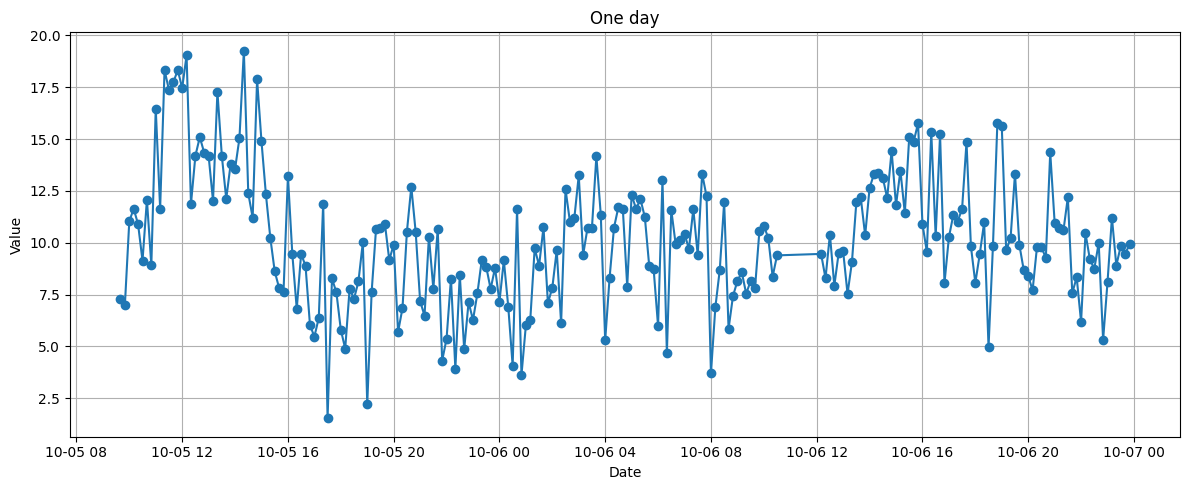

In [13]:
filtered = data.loc['2020-10-05':'2020-10-06']
plt.figure(figsize=(12, 5))
plt.plot(filtered.index, filtered['prediction_mu__var1'], marker = "o")
plt.title('One day')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


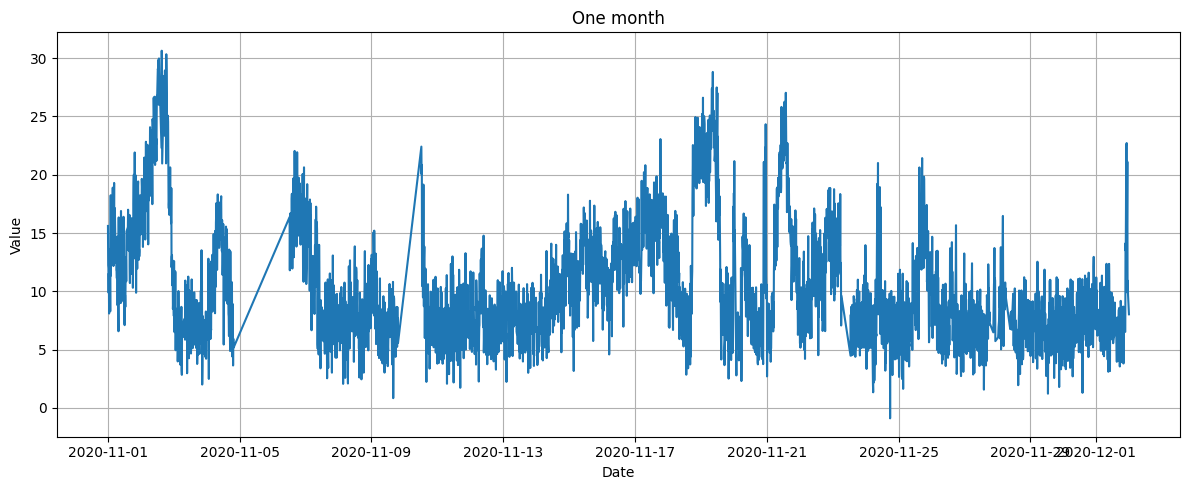

In [16]:
filtered = data.loc['2020-11-01':'2020-12-01']
plt.figure(figsize=(12, 5))
plt.plot(filtered.index, filtered['prediction_mu__var1'])
plt.title('One month')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## Aggregating with pandas

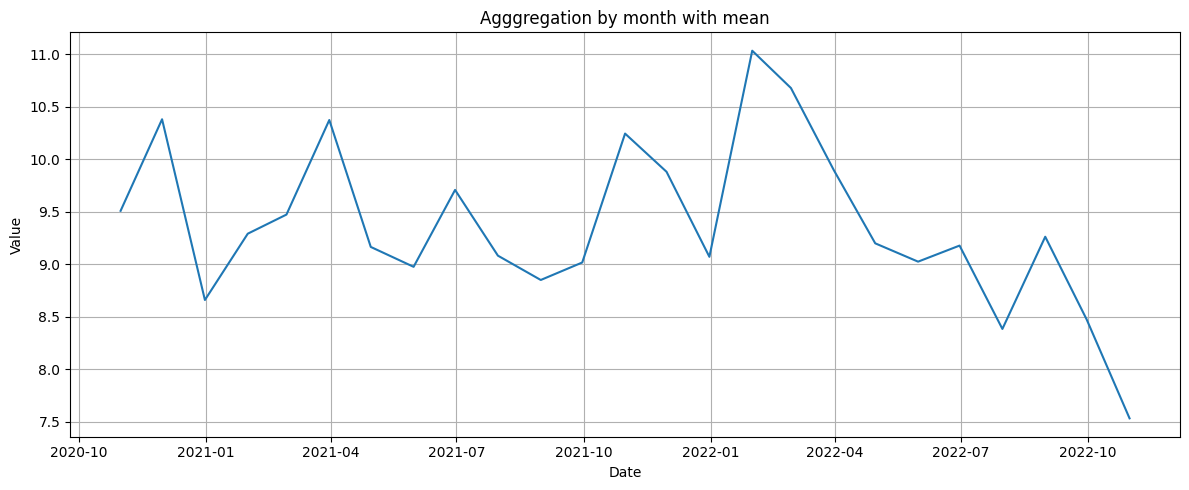

In [23]:
monthly = data.resample('ME').mean()
plt.figure(figsize=(12, 5))
plt.plot(monthly.index, monthly['prediction_mu__var1'])
plt.title('Agggregation by month with mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

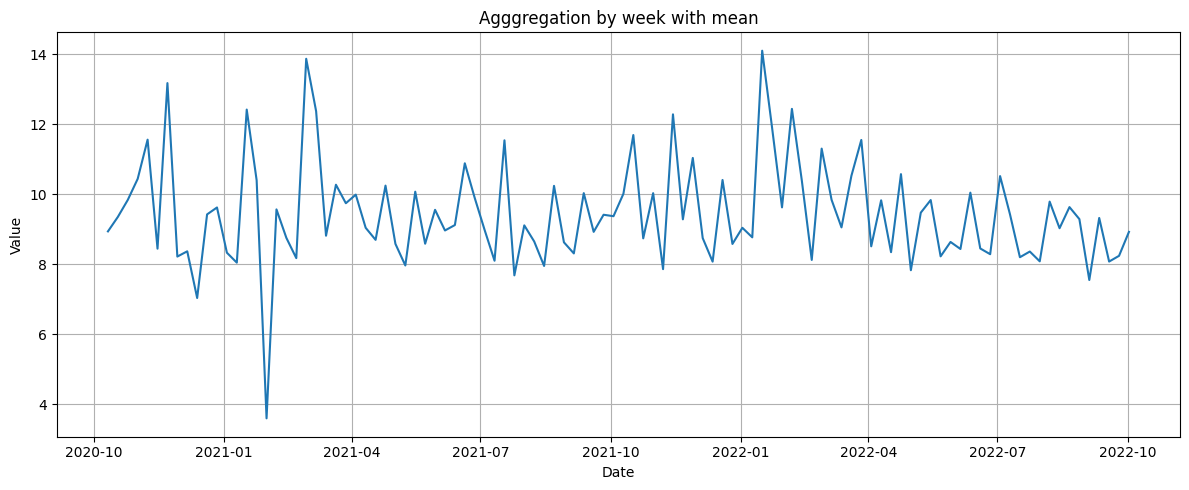

In [24]:
monthly = data.resample('W').mean()
plt.figure(figsize=(12, 5))
plt.plot(monthly.index, monthly['prediction_mu__var1'])
plt.title('Agggregation by week with mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

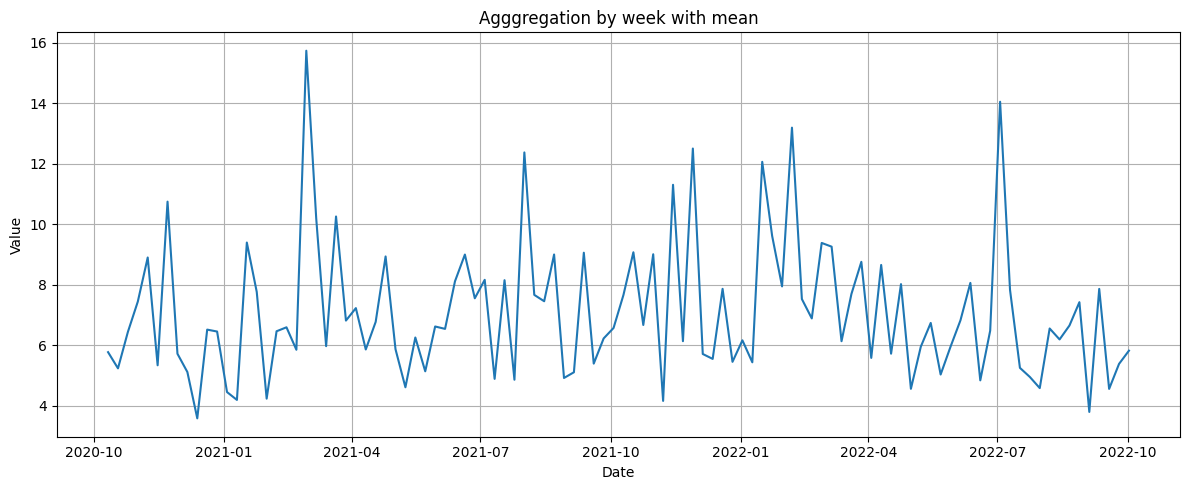

In [26]:
monthly = data.resample('W').mean()
plt.figure(figsize=(12, 5))
plt.plot(monthly.index, monthly['true_value__var1'])
plt.title('Agggregation by week with mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()